In [9]:
import numpy as np #linear algebra
import pandas as pd #data processing
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing into dataframe

df_Top_10_By_GenereWithTopPlayers = pd.read_excel("Top_10_By_Genre_Top_Players_new.xlsx", sheet_name='Export')
df_Stars = pd.read_excel ('df_StarActors_NoDups.xlsx', sheet_name='Export')
df_Bankability = pd.read_excel ('./Prj_Data/ImdbScrapingData/TheNumbers/output/DFBankaability.xlsx', sheet_name='Export')

In [ ]:
#________________________BOX PLOTS TO CREATE CRITERIA FOR "A PLAYERS"______________________________________________

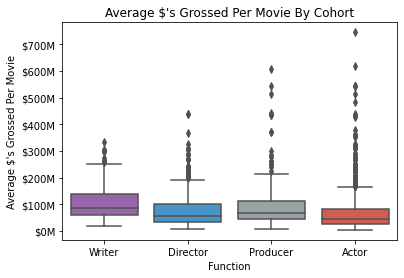

In [13]:
# Show box plot of average dollars generated per movie for entire population

df_Stars_short = df_Stars[["Contribution", "Movies", "Average"]]
# fig, ax = plt.subplots(figsize=(11, 8));
fig, ax = plt.subplots();
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette(flatui))


g = sns.boxplot(x="Contribution", y="Average", data=df_Stars_short, order=["Writer", "Director", "Producer", "Actor"]);
ylabels = ['${:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);

# g.legend().set_title('Average $ Generated Per Movie ($M)');
plt.ylabel("Average $'s Grossed Per Movie");
plt.xlabel("Function");
plt.title("Average $'s Grossed Per Movie By Cohort");

# print(ax.artists[1].get_facecolor)


plt.savefig("BoxPlot-Average$.pdf",transparent=True); 

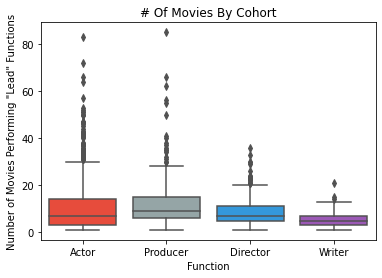

In [4]:
df_Stars_short = df_Stars[["Contribution", "Movies", "Average"]]
# fig, ax = plt.subplots(figsize=(11, 8));
fig, ax = plt.subplots();

g = sns.boxplot(x=df_Stars["Contribution"], y="Movies", data=df_Stars_short, order=[ "Actor", "Producer", "Director","Writer"] )

plt.ylabel('Number of Movies Performing "Lead" Functions');
plt.xlabel("Function");
plt.title("# Of Movies By Cohort");

Actor = ax.artists[0]
Producer = ax.artists[1]
Dir = ax.artists[2]
Writer = ax.artists[3]

# Change the appearance of that box

Actor.set_facecolor("#e74c3c")
Producer.set_facecolor("#95a5a6")
Dir.set_facecolor("#3498db")
Writer.set_facecolor("#9b59b6")


plt.savefig("BoxPlot-#OfMovies.png",transparent=True); 



In [ ]:
#________________________BOX PLOTS END______________________________________________

In [ ]:
#________________________SCATTER PLAT SHOWING A PLAYERS BY TOP MOST PROFITABLE MOVIES BY GENERA___________________________

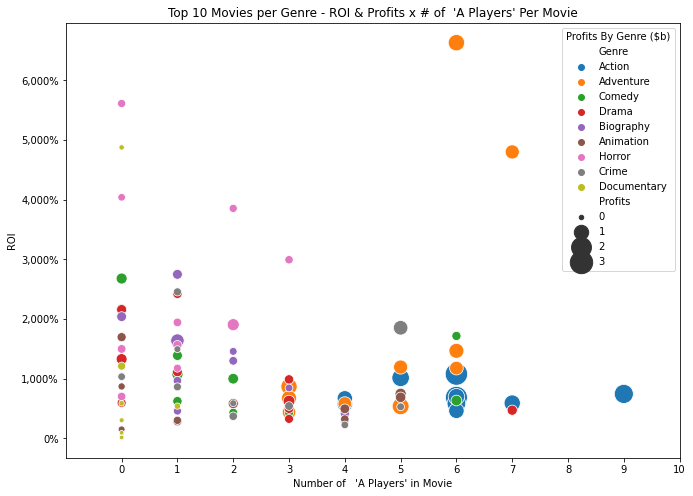

In [11]:
fig, ax = plt.subplots(figsize=(11, 8));  
g = sns.scatterplot(ax=ax,y="ROIPercent", x="Total",hue="Genre", size="Profits", sizes=(20, 500), data=df_Top_10_By_GenereWithTopPlayers);
g.set(xlim = (-1,10), xticks=[0,1,2,3,4,5,6,7,8,9,10],);


plt.ylabel("ROI");
plt.xlabel("Number of   'A Players' in Movie");
plt.title("Top 10 Movies per Genre - ROI & Profits x # of  'A Players' Per Movie");

# ylabels = ['{:,.0f}'.format(y) + 'B' for y in g.get_yticks()/1000]
# g.set_yticklabels(ylabels)
ylabels = ['{:,.0f}'.format(y) + '%' for y in g.get_yticks()]
g.set_yticklabels(ylabels);

g.legend().set_title('Profits By Genre ($b)');
plt.ylabel("ROI");
plt.xlabel("Number of   'A Players' in Movie");
plt.title("Top 10 Movies per Genre - ROI & Profits x # of  'A Players' Per Movie");


plt.savefig("ProfitsByPlayers.png",transparent=True); 

In [4]:
df_Top_10_By_GenereWithTopPlayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Genre       90 non-null     object 
 1   Title       90 non-null     object 
 2   Profits     90 non-null     float64
 3   ROIPercent  90 non-null     int64  
 4   A           90 non-null     int64  
 5   D           90 non-null     int64  
 6   P           90 non-null     int64  
 7   W           90 non-null     int64  
 8   Total       90 non-null     int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 6.5+ KB


In [ ]:
#________________________BARH CHART SHOWING BANKABILITYA___________________________

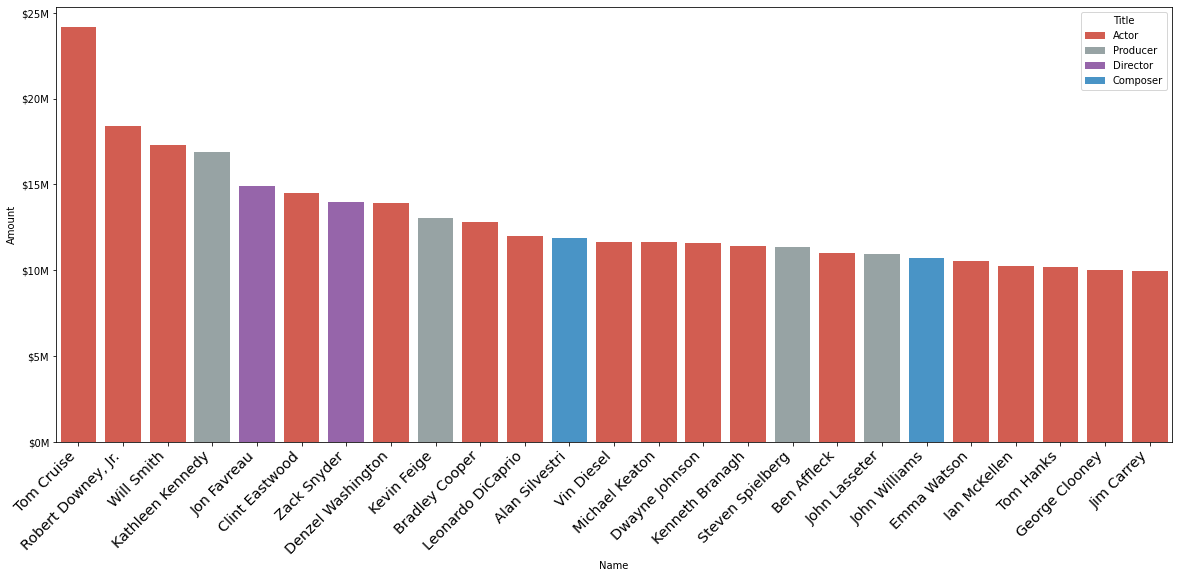

In [14]:
fig, ax = plt.subplots(figsize=(20, 8));  
df_Bankability_Short = df_Bankability.head(25);

g = sns.barplot(ax=ax,y="Amount", x="Name", hue="Title", data=df_Bankability_Short, 
                palette=["#e74c3c", "#95a5a6","#9b59b6", "#3498db", "#34495e", "#2ecc71"], dodge=False);

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='x-large');

ylabels = ['${:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);


In [ ]:
#___________________________________KEEP JUST IN CASE_____________________________________________________________________

In [51]:
#Find Stats for # of movies
test = df_Stars.groupby(["Contribution"])["Movies"]
test.describe().style.format('{0:,.0f}')


,count,mean,std,min,25%,50%,75%,max
Contribution,,,,,,,,
Actor,"1,301",10,10,1,3,7,14,83
Director,350,9,6,1,5,7,11,36
Producer,361,12,10,1,6,9,15,85
Writer,260,6,3,1,3,5,7,21


In [54]:
#Find Stats for Average dollars gerenrate per movie
test = df_Stars.groupby(["Contribution"])["Average"]
test.describe().style.format('${0:,.0f}')

,count,mean,std,min,25%,50%,75%,max
Contribution,,,,,,,,
Actor,"$1,000","$67,039,000","$71,017,000","$4,481,000","$25,944,000","$45,279,000","$82,266,000","$745,749,000"
Director,$0,"$80,163,000","$68,771,000","$9,080,000","$34,443,000","$57,294,000","$100,228,000","$439,056,000"
Producer,$0,"$92,337,000","$78,866,000","$9,491,000","$45,003,000","$68,135,000","$113,936,000","$608,582,000"
Writer,$0,"$110,060,000","$65,247,000","$18,123,000","$61,564,000","$88,026,000","$138,117,000","$333,172,000"


In [2]:
# Separate data by function Just in case
# df_actors = df_Stars[df_Stars["Contribution"]=="Actor"][["Movies", "Average"]]
# df_dir = df_Stars[df_Stars["Contribution"]=="Director"][["Movies", "Average"]]
# df_ScrW = df_Stars[df_Stars["Contribution"]=="Writer"][["Movies", "Average"]]
# df_prod = df_Stars[df_Stars["Contribution"]=="Producer"][["Movies", "Average"]]

(0.0, 89.2)

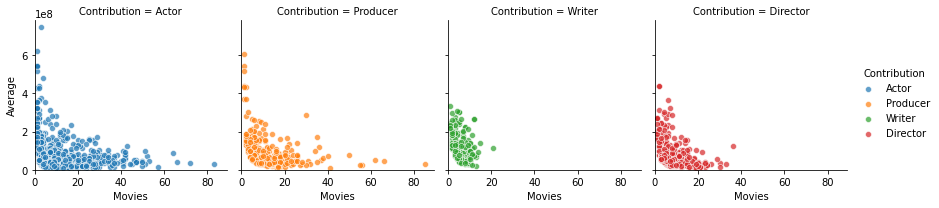

In [8]:
g = sns.FacetGrid(test, col="Contribution", hue="Contribution");
g.map(sns.scatterplot, "Movies", "Average", alpha=.7);
g.add_legend();

plt.ylim(0, None)
plt.xlim(0, None)

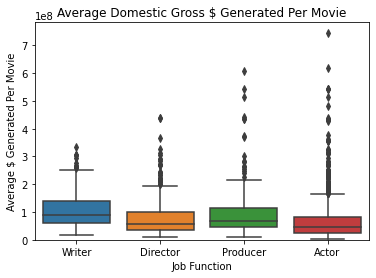

In [114]:
# Show box plot of average dollars generated per movie for entire population
df_Stars_short = df_Stars[["Contribution", "Movies", "Average"]]
fig, ax = plt.subplots(figsize=(11, 8));

g = sns.scatterplot(ax=ax,y="ROIPercent", x="Total",hue="Genre", size="Profits", sizes=(20, 500), data=df_Top_10_By_GenereWithTopPlayers);
g.set(xlim = (-1,10), xticks=[0,1,2,3,4,5,6,7,8,9,10],);



boxplot = sns.boxplot(x="Contribution", y="Average", data=df_Stars_short, order=["Writer", "Director", "Producer", "Actor"]);
boxplot.set(xlabel ="Job Function", ylabel='Average $ Generated Per Movie', title='Average Domestic Gross $ Generated Per Movie');
plt.ylim(0, None);
# plt.xlim(0, None)
ylabels = ['${:,.0f}'.format(y) + 'M' for y in g.get_yticks()]
plt.savefig("BoxPlot-Average$.png",transparent=True); 


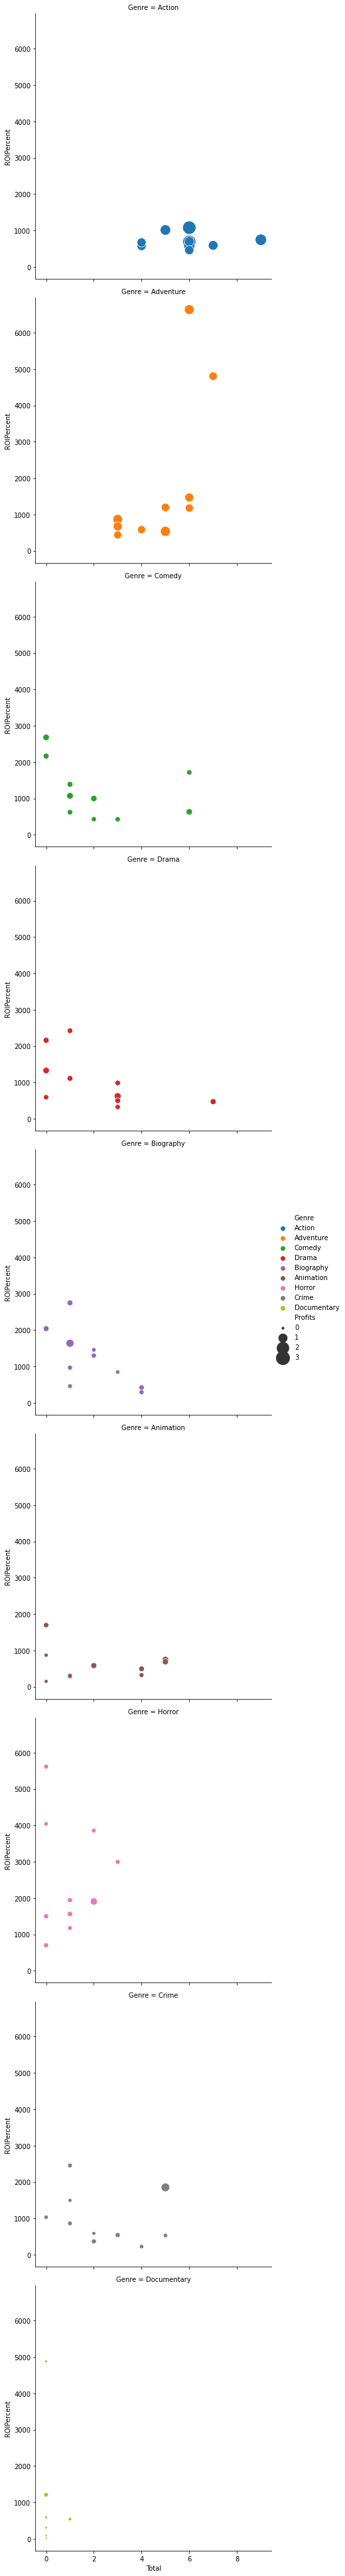

In [44]:
sns.relplot(y="ROIPercent", x="Total", row="Genre", hue="Genre",size="Profits", sizes=(10, 400), height=6, data=df_Top_10_By_GenereWithTopPlayers);

plt.savefig('sample.pdf')

In [3]:
df_Stars.to_clipboard()